In [1]:
%matplotlib inline

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [2]:
adata = sc.read('/home/ngr4/scratch60/rpczi/lungmap.h5ad')

In [18]:
adata.obs['age_sex'] = adata.obs['age'].astype(str) + ', ' + adata.obs['sex'].astype(str)
adata.obs['age_sex'] = adata.obs['age_sex'].astype('category')

In [19]:
dt = adata.obs.groupby(['celltype', 'age_sex']).count().reset_index()

In [20]:
dt.head()

,celltype,age_sex,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters,age,sex,donor,batch,lineage
0,AT1/AT2-like,"31wk, F",129,129,129,129,129,129,129,129,129
1,AT1/AT2-like,"31wk, M",312,312,312,312,312,312,312,312,312
2,AT1/AT2-like,"31yr, F",29,29,29,29,29,29,29,29,29
3,AT1/AT2-like,"31yr, M",51,51,51,51,51,51,51,51,51
4,AT1/AT2-like,"3yr, F",35,35,35,35,35,35,35,35,35


Text(0, 0.5, 'Count (#)')

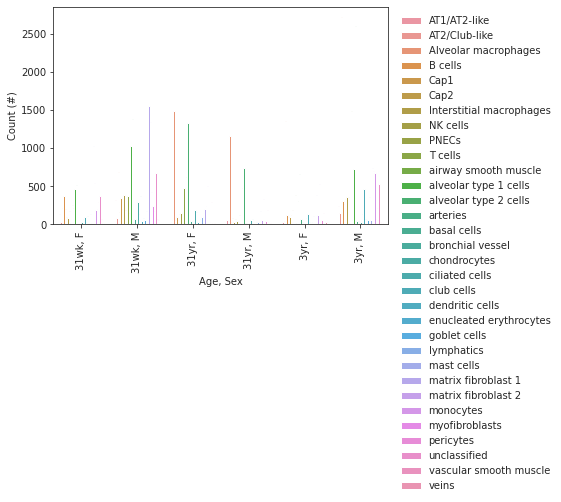

In [29]:
fig, ax = plt.subplots(1, 1)
sns.barplot(x='age_sex', y='age', 
            data=dt,
            ci=None,
            hue='celltype', 
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1))
ax.set_xlabel('Age, Sex')
ax.set_ylabel('Count (#)')

In [30]:
# group cell types
adata.obs['ctype'] = 'Unclassified'

In [33]:
adata = sc.read('/home/ngr4/scratch60/rpczi/lungmap.h5ad')
rpdata = sc.read('/home/ngr4/project/collabs/grants/czi_rp_2103/data/processed/rpczi_cpb_combat_knn100.h5ad')

In [35]:
adata = adata.concatenate(rpdata, batch_key='source', batch_categories=['LungMap', 'CPB'])
adata.obs.head()

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/anndata/_core/merge.py:894: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters,age,sex,donor,batch,celltype,lineage,...,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pmito,n_genes,leiden,init_ctype,source
D032_AACAAGACAGCCCACA-LungMap,D032,5986.0,2531.0,0.0,3yr,M,D032,3,Alveolar macrophages,Immune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LungMap
D032_AACAGGGGTCCAGCGT-LungMap,D032,2146.0,1243.0,0.0,3yr,M,D032,3,Alveolar macrophages,Immune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LungMap
D032_AACGAAAGTTCCATTT-LungMap,D032,1010.0,636.0,0.0,3yr,M,D032,3,Alveolar macrophages,Immune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LungMap
D032_AAGCATCGTGGCTTGC-LungMap,D032,4669.0,2228.0,0.0,3yr,M,D032,3,Alveolar macrophages,Immune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LungMap
D032_AAGTTCGTCAGGAACG-LungMap,D032,3344.0,1809.0,7.0,3yr,M,D032,3,monocytes,Immune,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LungMap


In [37]:
adata.obs['ctype'] = 'None'
adata.obs.loc[adata.obs['source']=='LungMap', 'ctype'] = adata.obs.loc[adata.obs['source']=='LungMap', 'celltype']
adata.obs.loc[adata.obs['source']=='CPB', 'ctype'] = adata.obs.loc[adata.obs['source']=='CPB', 'init_ctype']
adata.obs['ctype'] = adata.obs['ctype'].astype('category')

In [40]:
adata.obs.loc[adata.obs['source']=='LungMap', 'batch'] = 'LM' + adata.obs.loc[adata.obs['source']=='LungMap', 'age'].astype(str) + adata.obs.loc[adata.obs['source']=='LungMap', 'sex'].astype(str)
adata.obs['age'] = adata.obs['age'].astype(str)
adata.obs['sex'] = adata.obs['sex'].astype(str)
adata.obs.loc[adata.obs['batch']=='CPB1', 'age'] = '7mos'
adata.obs.loc[adata.obs['batch']=='CPB2', 'age'] = '7mos'
adata.obs.loc[adata.obs['batch']=='CPB3', 'age'] = '8y'
adata.obs.loc[adata.obs['batch']=='CPB4', 'age'] = '6mos'
adata.obs.loc[adata.obs['batch']=='CPB5', 'age'] = '11mos'
adata.obs.loc[adata.obs['batch']=='CPB6', 'age'] = '21mos'
adata.obs.loc[adata.obs['batch']=='CPBX', 'age'] = '11mos'
adata.obs.loc[adata.obs['batch']=='CPB1', 'sex'] = 'M'
adata.obs.loc[adata.obs['batch']=='CPB2', 'sex'] = 'F'
adata.obs.loc[adata.obs['batch']=='CPB3', 'sex'] = 'F'
adata.obs.loc[adata.obs['batch']=='CPB4', 'sex'] = 'M'
adata.obs.loc[adata.obs['batch']=='CPB5', 'sex'] = 'F'
adata.obs.loc[adata.obs['batch']=='CPB6', 'sex'] = 'M'
adata.obs.loc[adata.obs['batch']=='CPBX', 'sex'] = 'M'

In [41]:
adata.obs['age_sex'] = adata.obs['age'].astype(str) + ', ' + adata.obs['sex'].astype(str)
adata.obs['age_sex'] = adata.obs['age_sex'].astype('category')

In [49]:
dt = adata.obs.groupby(['ctype', 'age_sex']).count().reset_index()

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

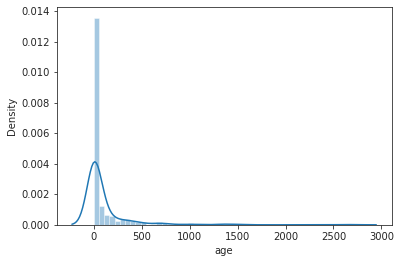

In [56]:
sns.distplot(dt['age'])

Text(0, 0.5, 'Count (#)')

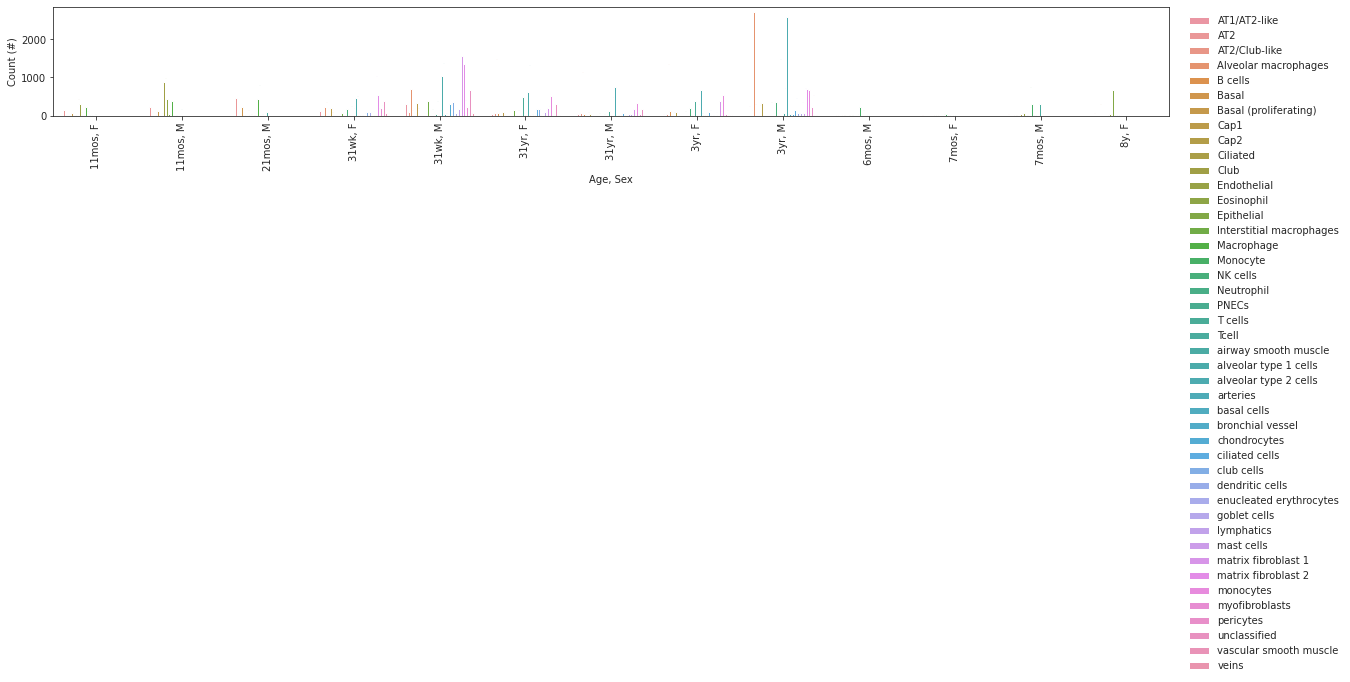

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(20, 2))
sns.barplot(x='age_sex', y='age', 
            data=dt,
            ci=None,
            hue='ctype', 
            ax=ax,
           )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1))
ax.set_xlabel('Age, Sex')
ax.set_ylabel('Count (#)')

In [59]:
dt['age_sex'].unique()

['11mos, F', '11mos, M', '21mos, M', '31wk, F', '31wk, M', ..., '3yr, M', '6mos, M', '7mos, F', '7mos, M', '8y, F']
Length: 13
Categories (13, object): ['11mos, F', '11mos, M', '21mos, M', '31wk, F', ..., '6mos, M', '7mos, F', '7mos, M', '8y, F']